### Import de bibliotecas

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

### Início da execução

In [15]:
node_df = pd.read_excel('scientists.xlsx', sheet_name='Nós')
edge_df = pd.read_excel('scientists.xlsx', sheet_name='Arestas')

Centralidade de Grau:
{'Isaac Newton': 0.2, 'Robert Boyle': 0.2, 'Daniel Bernoulli ': 0.13333333333333333, 'Antoine Lavoisier': 0.06666666666666667, 'Antoine Lavoisier ': 0.06666666666666667, 'Charles Blagden': 0.06666666666666667, 'Henry Cavendish': 0.13333333333333333, 'Joseph Priestley': 0.3333333333333333, 'André-Marie Àmpere': 0.06666666666666667, 'John Freind': 0.06666666666666667, 'John Kiel': 0.06666666666666667, 'John Herapath': 0.06666666666666667, 'John James Waterson': 0.06666666666666667, 'John Dalton': 0.2, 'William Henry': 0.06666666666666667, 'Joseph Black': 0.06666666666666667}

Centralidade de Betweenness:
{'Isaac Newton': 0.2, 'Robert Boyle': 0.33333333333333337, 'Daniel Bernoulli ': 0.009523809523809525, 'Antoine Lavoisier': 0.0, 'Antoine Lavoisier ': 0.0, 'Charles Blagden': 0.0, 'Henry Cavendish': 0.10476190476190478, 'Joseph Priestley': 0.4190476190476191, 'André-Marie Àmpere': 0.0, 'John Freind': 0.0, 'John Kiel': 0.0, 'John Herapath': 0.0, 'John James Waterson':

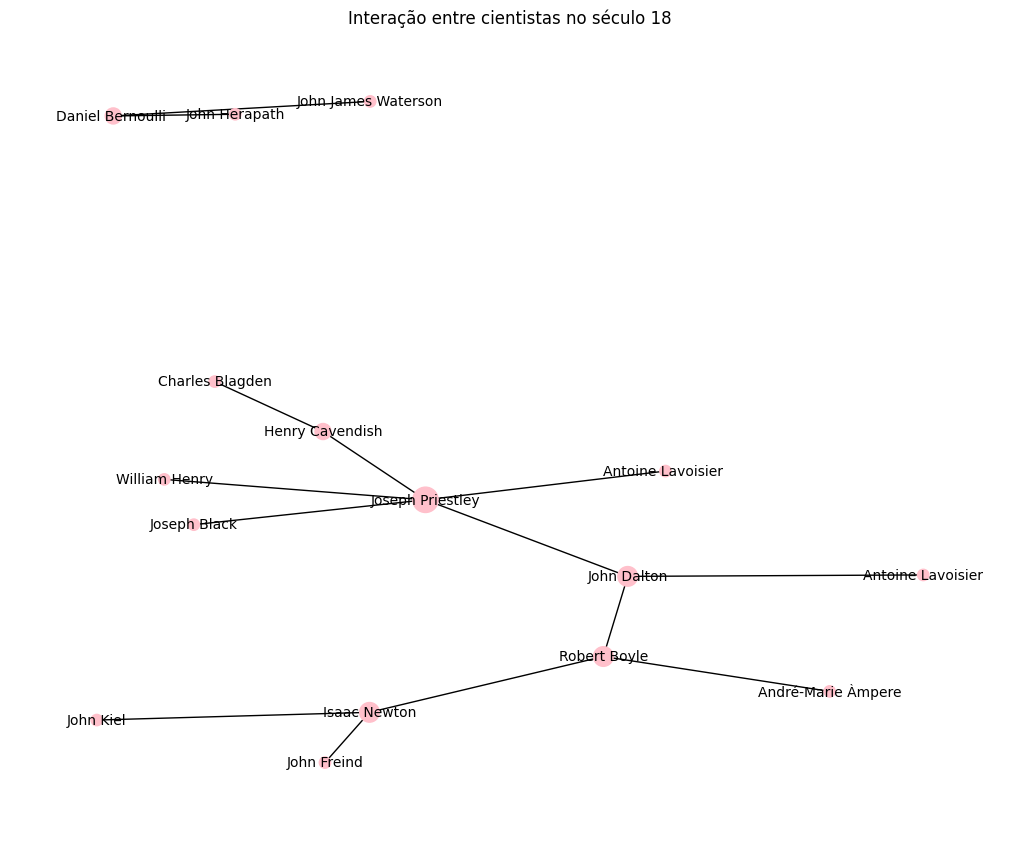

Centralidade de Grau:
{'Isaac Newton': 0.08333333333333333, 'Robert Boyle': 0.08333333333333333, 'Daniel Bernoulli ': 0.05555555555555555, 'Antoine Lavoisier': 0.027777777777777776, 'Antoine Lavoisier ': 0.027777777777777776, 'Charles Blagden': 0.027777777777777776, 'Henry Cavendish': 0.05555555555555555, 'Joseph Priestley': 0.1388888888888889, 'André-Marie Àmpere': 0.027777777777777776, 'John Freind': 0.027777777777777776, 'John Kiel': 0.027777777777777776, 'John Herapath': 0.027777777777777776, 'John James Waterson': 0.027777777777777776, 'John Dalton': 0.16666666666666666, 'William Henry': 0.05555555555555555, 'Joseph Black': 0.027777777777777776, 'John Joseph Thomsom': 0.05555555555555555, 'Michael Faraday': 0.027777777777777776, 'Humphry Davy': 0.08333333333333333, 'Louis J. Gay-Lussac': 0.08333333333333333, 'Claude Louis Berthollet': 0.027777777777777776, 'Jacob Berzellius ': 0.027777777777777776, 'Robert Brown': 0.027777777777777776, 'Robert Brown ': 0.027777777777777776, 'Max P

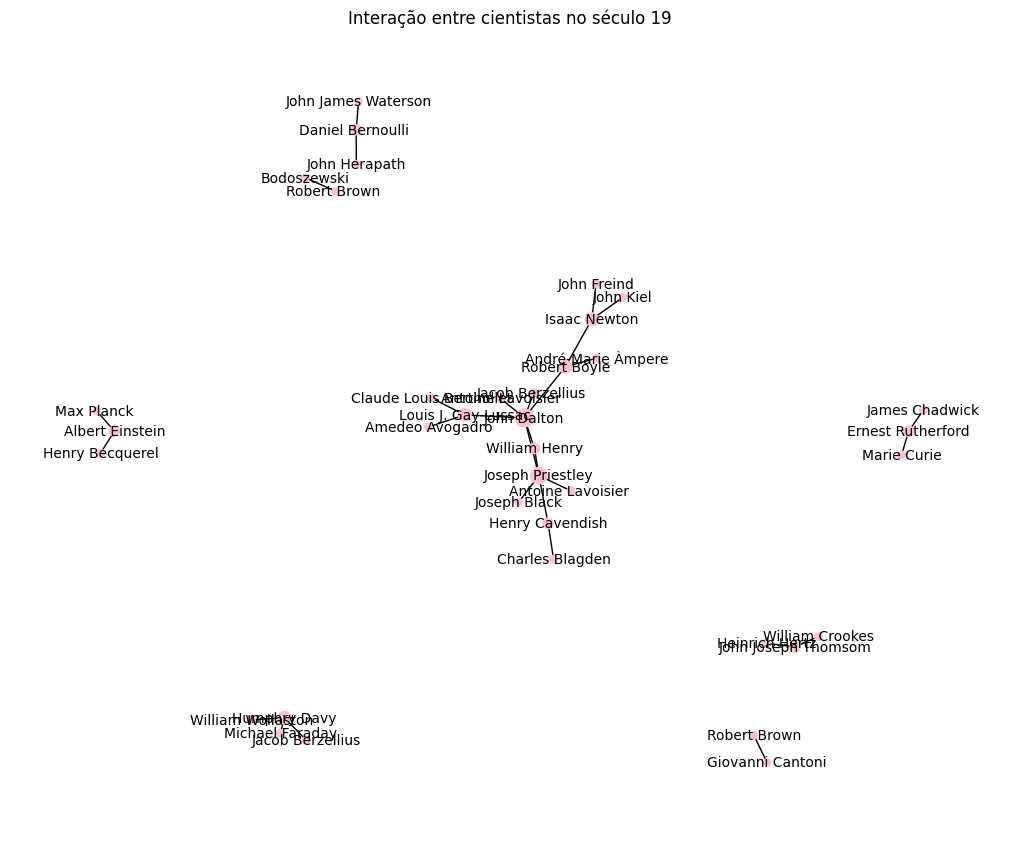

Centralidade de Grau:
{'Isaac Newton': 0.05172413793103448, 'Robert Boyle': 0.05172413793103448, 'Daniel Bernoulli ': 0.034482758620689655, 'Antoine Lavoisier': 0.017241379310344827, 'Antoine Lavoisier ': 0.017241379310344827, 'Charles Blagden': 0.017241379310344827, 'Henry Cavendish': 0.034482758620689655, 'Joseph Priestley': 0.08620689655172414, 'André-Marie Àmpere': 0.017241379310344827, 'John Freind': 0.017241379310344827, 'John Kiel': 0.017241379310344827, 'John Herapath': 0.017241379310344827, 'John James Waterson': 0.017241379310344827, 'John Dalton': 0.10344827586206896, 'William Henry': 0.034482758620689655, 'Joseph Black': 0.017241379310344827, 'John Joseph Thomsom': 0.08620689655172414, 'Michael Faraday': 0.017241379310344827, 'Humphry Davy': 0.05172413793103448, 'Louis J. Gay-Lussac': 0.05172413793103448, 'Claude Louis Berthollet': 0.017241379310344827, 'Jacob Berzellius ': 0.017241379310344827, 'Robert Brown': 0.034482758620689655, 'Robert Brown ': 0.017241379310344827, 'M

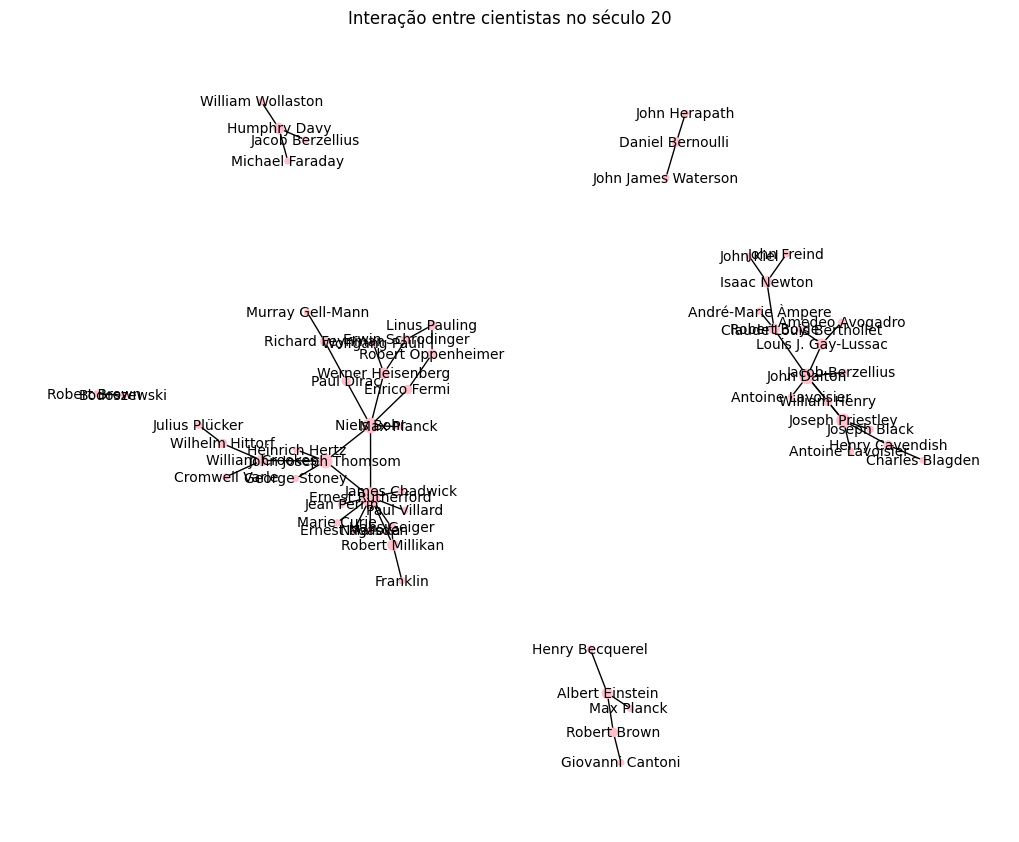

In [47]:
G = nx.Graph()

edge_sec = edge_df.groupby(['Seculo_Interacao'])

for name, group in edge_sec:
    if isinstance(name, tuple):
        name = name[0]
    for _, row in group.iterrows():
        unique_scientist = group['Cientista_Origem'].unique()
        for scientist in unique_scientist:
            G.add_node(scientist)
        G.add_edge(row['Cientista_Origem'], row['Cientista_Destino'])

    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    print("Centralidade de Grau:")
    print(degree_centrality)

    print("\nCentralidade de Betweenness:")
    print(betweenness_centrality)

    print("\nCentralidade de Proximidade:")
    print(closeness_centrality)

    print("\nCentralidade de Autovetor:")
    print(eigenvector_centrality)

    node_sizes = [degree_centrality[node] * 1000 for node in G.nodes()]
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True, node_size=node_sizes, node_color='pink', font_size=10)
    plt.title(f"Interação entre cientistas no século {name}")
    plt.show()